In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [11]:
df = pd.read_csv('data/IMDB_Dataset.csv')
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [12]:
# Pre-trained natural language processing pipeline 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm

nlp = spacy.load('en_core_web_sm')

In [13]:
sentiments = df.drop("review", axis=1)
reviews = df.drop("sentiment", axis=1)
sentiments

,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive
...,...
49995,positive
49996,negative
49997,negative
49998,negative


In [14]:
import re

def clean_text(text):
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'@\w+', '', text)  
    text = re.sub(r'#\w+', '', text) 
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    text = text.strip()
    return text

reviews["review"] = reviews["review"].apply(clean_text)

In [15]:
def lemmatize_and_remove_pronouns(text):
    doc = nlp(text)
    lemmatize_tokens = [token.lemma_ for token in doc 
                        if not token.is_stop 
                        and not token.is_punct
                        and token.pos_ not in ['PRON', 'DET']] 

    return lemmatize_tokens

reviews["lemmatized_tokens"] = reviews["review"].apply(lemmatize_and_remove_pronouns)
reviews.head()

,review,lemmatized_tokens
0,one of the other reviewers has mentioned that ...,"[reviewer, mention, watch, , oz, episode, ll,..."
1,a wonderful little production the filming te...,"[wonderful, little, production, , film, tech..."
2,i thought this was a wonderful way to spend ti...,"[think, wonderful, way, spend, time, hot, summ..."
3,basically theres a family where a little boy j...,"[basically, s, family, little, boy, jake, thin..."
4,petter matteis love in the time of money is a ...,"[petter, matteis, love, time, money, visually,..."


In [16]:
lemmatized_reviews = reviews["lemmatized_tokens"]
custom_stopwords = set("""
x y year 1990 2005 21 233 say will your yours yourself yourselves you yond yonder yon ye yet z zillion j u umpteen usually us username uponed upons uponing upon ups upping upped up unto until unless unlike unliker unlikest under underneath use used usedest r rath rather rathest rathe re relate related relatively regarding really res respecting respectively q quite que qua n neither neaths neath nethe nethermost necessary necessariest necessarier never nevertheless nigh nighest nigher nine noone nobody nobodies nowhere nowheres no noes nor nos no-one none not notwithstanding nothings nothing nathless natheless t ten tills till tilled tilling to towards toward towardest towarder together too thy thyself thus than that those thou though thous thouses thoroughest thorougher thorough thoroughly thru thruer thruest thro through throughout throughest througher thine this thises they thee the then thence thenest thener them themselves these therer there thereby therest thereafter therein thereupon therefore their theirs thing things three two o oh owt owning owned own owns others other otherwise otherwisest otherwiser of often oftener oftenest off offs offest one ought oughts our ours ourselves ourself out outest outed outwith outs outside over overallest overaller overalls overall overs or orer orest on oneself onest ons onto a atween at athwart atop afore afterward afterwards after afterest afterer ain an any anything anybody anyone anyhow anywhere anent anear and andor another around ares are aest aer against again accordingly abaft abafter abaftest abovest above abover abouter aboutest about aid amidst amid among amongst apartest aparter apart appeared appears appear appearing appropriating appropriate appropriatest appropriates appropriater appropriated already always also along alongside although almost all allest aller allyou alls albeit awfully as aside asides aslant ases astrider astride astridest astraddlest astraddler astraddle availablest availabler available aughts aught vs v variousest variouser various via vis-a-vis vis-a-viser vis-a-visest viz very veriest verier versus k g go gone good got gotta gotten get gets getting b by byandby by-and-by bist both but buts be beyond because became becomes become becoming becomings becominger becomingest behind behinds before beforehand beforehandest beforehander bettered betters better bettering betwixt between beneath been below besides beside m my myself mucher muchest much must musts musths musth main make mayest many mauger maugre me meanwhiles meanwhile mostly most moreover more might mights midst midsts h huh humph he hers herself her hereby herein hereafters hereafter hereupon hence hadst had having haves have has hast hardly hae hath him himself hither hitherest hitherer his how-do-you-do however how howbeit howdoyoudo hoos hoo w woulded woulding would woulds was wast we wert were with withal without within why what whatever whateverer whateverest whatsoeverer whatsoeverest whatsoever whence whencesoever whenever whensoever when whenas whether wheen whereto whereupon wherever whereon whereof where whereby wherewithal wherewith whereinto wherein whereafter whereas wheresoever wherefrom which whichever whichsoever whilst while whiles whithersoever whither whoever whosoever whoso whose whomever s syne syn shalling shall shalled shalls shoulding should shoulded shoulds she sayyid sayid said saider saidest same samest sames samer saved sans sanses sanserifs sanserif so soer soest sobeit someone somebody somehow some somewhere somewhat something sometimest sometimes sometimer sometime several severaler severalest serious seriousest seriouser senza send sent seem seems seemed seemingest seeminger seemings seven summat sups sup supping supped such since sine sines sith six stop stopped p plaintiff plenty plenties please pleased pleases per perhaps particulars particularly particular particularest particularer pro providing provides provided provide probably l layabout layabouts latter latterest latterer latterly latters lots lotting lotted lot lest less ie ifs if i info information itself its it is idem idemer idemest immediate immediately immediatest immediater in inwards inwardest inwarder inward inwardest inwarder inwards inasmuch into instead insofar indicates indicated indicate indicating indeed inc f fact facts fs figupon figupons figuponing figuponed few fewer fewest frae from failing failings five furthers furtherer furthered furtherest further furthering furthermore fourscore followthrough for forwhy fornenst formerly former formerer formerest formers forbye forby fore forever forer fores four d ddays dday do doing doings doe does doth downwarder downwardest downward downwards downs done doner dones donest dos dost did differentest differenter different describing describe describes described despiting despites despited despite during c cum circa chez cer certain certainest certainer cest canst cannot cant cants canting cantest canted co could couldst comeon comeons come-ons come-on concerning concerninger concerningest consequently considering e eg eight either even evens evenser evensest evened evenest ever everyone everything everybody everywhere every ere each et etc else elsewhere else ex excepted excepts except excepting exes enough
""".split()) # downloaded from kaggle numbers are because of some numbers that didn't get 

def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token.lower() not in custom_stopwords and len(token) > 3 and not token.isnumeric()]
    return filtered_tokens

reviews["final_tokens"] = reviews["lemmatized_tokens"].apply(remove_stopwords)
reviews.head()

,review,lemmatized_tokens,final_tokens
0,one of the other reviewers has mentioned that ...,"[reviewer, mention, watch, , oz, episode, ll,...","[reviewer, mention, watch, episode, hook, righ..."
1,a wonderful little production the filming te...,"[wonderful, little, production, , film, tech...","[wonderful, little, production, film, techniqu..."
2,i thought this was a wonderful way to spend ti...,"[think, wonderful, way, spend, time, hot, summ...","[think, wonderful, spend, time, summer, weeken..."
3,basically theres a family where a little boy j...,"[basically, s, family, little, boy, jake, thin...","[basically, family, little, jake, think, zombi..."
4,petter matteis love in the time of money is a ...,"[petter, matteis, love, time, money, visually,...","[petter, matteis, love, time, money, visually,..."


In [17]:
final_tokens = reviews.drop(columns = ["review", "lemmatized_tokens"])
final_tokens.head()


,final_tokens
0,"[reviewer, mention, watch, episode, hook, righ..."
1,"[wonderful, little, production, film, techniqu..."
2,"[think, wonderful, spend, time, summer, weeken..."
3,"[basically, family, little, jake, think, zombi..."
4,"[petter, matteis, love, time, money, visually,..."


In [18]:
sentiments = sentiments.replace({"positive": 1, "negative": 0}).astype(int)
sentiments

/tmp/ipykernel_4851/1212529336.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sentiments = sentiments.replace({"positive": 1, "negative": 0}).astype(int)


,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [19]:
sentiments.to_pickle("data/sentiments.pkl")
final_tokens.to_pickle("data/final_tokens.pkl")

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(final_tokens, sentiments, test_size=0.30, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33333, random_state=42)


In [21]:
X_train["final_reviews"] = X_train["final_tokens"].apply(lambda x: " ".join(x))
X_test["final_reviews"] = X_test["final_tokens"].apply(lambda x: " ".join(x))
X_val["final_reviews"] = X_val["final_tokens"].apply(lambda x: " ".join(x))
X_train

,final_tokens,final_reviews
38094,"[love, train, stomach, movie, premise, steal, ...",love train stomach movie premise steal locomot...
40624,"[like, wrestlemania, later, cram, match, match...",like wrestlemania later cram match match usele...
49425,"[find, right, word, everybodys, problem, vaude...",find right word everybodys problem vaudevillet...
35734,"[suprise, movie, high, rating, imdb, movie, ea...",suprise movie high rating imdb movie easily ro...
41708,"[start, confess, tend, enjoy, action, movie, m...",start confess tend enjoy action movie military...
...,...,...
11284,"[shadow, magic, recapture, amazement, movie, a...",shadow magic recapture amazement movie audienc...
44732,"[find, movie, enjoyable, fairly, entertain, ch...",find movie enjoyable fairly entertain characte...
38158,"[avoid, terrible, movie, exciting, pointless, ...",avoid terrible movie exciting pointless murder...
860,"[production, surprise, absolutely, love, obscu...",production surprise absolutely love obscure ea...


In [22]:
X_train_tokenized = X_train.drop("final_reviews", axis=1)
X_train = X_train.drop("final_tokens", axis=1)
X_test_tokenized = X_test.drop("final_reviews", axis=1)
X_test = X_test.drop("final_tokens", axis=1)
X_val_tokenized = X_val.drop("final_reviews", axis=1)
X_val = X_val.drop("final_tokens", axis=1)
X_val

,final_reviews
45040,national lampoon remain animal house rightly f...
20713,great filmmaker piece garbage minute sheer ted...
9836,intrigue nasty boss character actual bosss dau...
44734,problem child goofiest movie people disagree d...
40160,shame movie cinematography plot support work s...
...,...
31387,film last minute maximum interesting conceptth...
35406,fine musical timeless worth time delicious act...
3375,matter hurt movie beenmaybe mislead countless ...
30489,like movie imply publish review actually movie...


In [23]:
X_train.to_pickle("data/X_train.pkl")
X_test.to_pickle("data/X_test.pkl")
X_val.to_pickle("data/X_val.pkl")
X_train_tokenized.to_pickle("data/X_train_tokenized.pkl")
X_test_tokenized.to_pickle("data/X_test_tokenized.pkl")
X_val_tokenized.to_pickle("data/X_val_tokenized.pkl")
y_train.to_pickle("data/y_train.pkl")
y_test.to_pickle("data/y_test.pkl")
y_val.to_pickle("data/y_val.pkl")





data is set and ready

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
X_train_vectorized = vectorizer.fit_transform(X_train["final_reviews"])
X_test_vectorized = vectorizer.transform(X_test["final_reviews"])
X_val_vectorized = vectorizer.transform(X_val["final_reviews"])

In [16]:
word_frequencies = np.asarray(X_train_vectorized.sum(axis=0)).flatten()

feature_names = vectorizer.get_feature_names_out()

sorted_indices = np.argsort(word_frequencies)[::-1]
top_words = [feature_names[i] for i in sorted_indices[:10000]]

print(top_words)  

['look like', 'watch movie', 'movie like', 'special effect', 'movie movie', 'like movie', 'watch film', 'waste time', 'feel like', 'film like', 'horror movie', 'horror film', 'think movie', 'movie watch', 'film film', 'great movie', 'like film', 'take place', 'movie think', 'high school', 'fall love', 'worth watch', 'story line', 'great film', 'love movie', 'movie time', 'highly recommend', 'real life', 'long time', 'movie great', 'tell story', 'sound like', 'love story', 'film time', 'time watch', 'read book', 'time movie', 'film watch', 'film think', 'film great', 'think film', 'movie come', 'film look', 'character development', 'people like', 'movie know', 'like watch', 'production value', 'time film', 'movie well', 'black white', 'support cast', 'movie look', 'movie start', 'young woman', 'find movie', 'action movie', 'scene movie', 'movie want', 'film movie', 'character movie', 'enjoy movie', 'spend time', 'movie film', 'know movie', 'recommend movie', 'well movie', 'scene film', 

In [17]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
svm_model = SVC()
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression(max_iter=1000)

In [19]:
svm_model.fit(X_train_vectorized, y_train)
knn_model.fit(X_train_vectorized, y_train)
logreg_model.fit(X_train_vectorized, y_train)

/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [20]:
y_val_pred_svm = svm_model.predict(X_val_vectorized)
y_val_pred_knn = knn_model.predict(X_val_vectorized)
y_val_pred_logreg = logreg_model.predict(X_val_vectorized)

val_acc_svm = accuracy_score(y_val, y_val_pred_svm)
val_acc_knn = accuracy_score(y_val, y_val_pred_knn)
val_acc_logreg = accuracy_score(y_val, y_val_pred_logreg)

print(f"Validation Accuracy - SVM: {val_acc_svm:.4f}")
print(f"Validation Accuracy - KNN: {val_acc_knn:.4f}")
print(f"Validation Accuracy - Logistic Regression: {val_acc_logreg:.4f}")


Validation Accuracy - SVM: 0.8058
Validation Accuracy - KNN: 0.4988
Validation Accuracy - Logistic Regression: 0.8294


In [113]:
# checking for KNN 
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_vectorized, y_train)
    print(f'{i} Neighbors Accuracy: {knn.score(X_val_vectorized, y_val)}')

/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1 Neighbors Accuracy: 0.5546


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


2 Neighbors Accuracy: 0.5278


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


3 Neighbors Accuracy: 0.5378


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


4 Neighbors Accuracy: 0.5544


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


5 Neighbors Accuracy: 0.5514


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


6 Neighbors Accuracy: 0.5474


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


7 Neighbors Accuracy: 0.5474


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


8 Neighbors Accuracy: 0.5522


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


9 Neighbors Accuracy: 0.5528


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


10 Neighbors Accuracy: 0.549


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


11 Neighbors Accuracy: 0.5512


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


12 Neighbors Accuracy: 0.5488


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


13 Neighbors Accuracy: 0.553


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


14 Neighbors Accuracy: 0.5468


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


15 Neighbors Accuracy: 0.552


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


16 Neighbors Accuracy: 0.5514


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


17 Neighbors Accuracy: 0.5502


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


18 Neighbors Accuracy: 0.5462


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


19 Neighbors Accuracy: 0.5524


In [22]:
# saving my models and vectorizer
with open("models/count_vectorizer_two_two/svm_model_two_two_gram.pkl", "wb") as f:
    pickle.dump(svm_model, f)

with open("models/count_vectorizer_two_two/logistic_model_two_two_gram.pkl", "wb") as f:
    pickle.dump(logreg_model, f)

with open("models/count_vectorizer_two_two/knn_model_two_two_gram.pkl", "wb") as f:
    pickle.dump(knn_model, f)

with open("models/count_vectorizer_two_two/count_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)





In [27]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_vectorized_onegram = vectorizer.fit_transform(X_train["final_reviews"])
X_test_vectorized_onegram = vectorizer.transform(X_test["final_reviews"])
X_val_vectorized_onegram = vectorizer.transform(X_val["final_reviews"])

In [28]:
svm_model = SVC()
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression(max_iter=1000)

In [29]:
svm_model.fit(X_train_vectorized_onegram, y_train)
knn_model.fit(X_train_vectorized_onegram, y_train)
logreg_model.fit(X_train_vectorized_onegram, y_train)

/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [30]:
y_val_pred_svm = svm_model.predict(X_val_vectorized_onegram)
y_val_pred_knn = knn_model.predict(X_val_vectorized_onegram)
y_val_pred_logreg = logreg_model.predict(X_val_vectorized_onegram)

val_acc_svm = accuracy_score(y_val, y_val_pred_svm)
val_acc_knn = accuracy_score(y_val, y_val_pred_knn)
val_acc_logreg = accuracy_score(y_val, y_val_pred_logreg)

print(f"Validation Accuracy - SVM: {val_acc_svm:.4f}")
print(f"Validation Accuracy - KNN: {val_acc_knn:.4f}")
print(f"Validation Accuracy - Logistic Regression: {val_acc_logreg:.4f}")

Validation Accuracy - SVM: 0.8732
Validation Accuracy - KNN: 0.5452
Validation Accuracy - Logistic Regression: 0.8802


In [32]:
with open("models/count_vectorizer_one_two/svm_model_one_two_gram.pkl", "wb") as f:
    pickle.dump(svm_model, f)

with open("models/count_vectorizer_one_two/logistic_model_one_two_gram.pkl", "wb") as f:
    pickle.dump(logreg_model, f)

with open("models/count_vectorizer_one_two/knn_model_one_two_gram.pkl", "wb") as f:
    pickle.dump(knn_model, f)

with open("models/count_vectorizer_one_two/count_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(  
    stop_words=None,    
    ngram_range=(1, 1)  
)

X_train_tfidf_vectorized_onegram = tfidf_vectorizer.fit_transform(X_train["final_reviews"])

X_test_tfid_vectorized_onegram = tfidf_vectorizer.transform(X_test["final_reviews"])
X_val_tfid_vectorized_onegram = tfidf_vectorizer.transform(X_val["final_reviews"])

X_train_tfidf_vectorized_onegram.shape

(35000, 111989)

In [35]:
svm_model = SVC()
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression(max_iter=1000)

In [36]:
svm_model.fit(X_train_tfidf_vectorized_onegram, y_train)
knn_model.fit(X_train_tfidf_vectorized_onegram, y_train)
logreg_model.fit(X_train_tfidf_vectorized_onegram, y_train)

/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [37]:
y_val_pred_svm = svm_model.predict(X_val_tfid_vectorized_onegram)
y_val_pred_knn = knn_model.predict(X_val_tfid_vectorized_onegram)
y_val_pred_logreg = logreg_model.predict(X_val_tfid_vectorized_onegram)

val_acc_svm = accuracy_score(y_val, y_val_pred_svm)
val_acc_knn = accuracy_score(y_val, y_val_pred_knn)
val_acc_logreg = accuracy_score(y_val, y_val_pred_logreg)

print(f"Validation Accuracy - SVM: {val_acc_svm:.4f}")
print(f"Validation Accuracy - KNN: {val_acc_knn:.4f}")
print(f"Validation Accuracy - Logistic Regression: {val_acc_logreg:.4f}")

Validation Accuracy - SVM: 0.8910
Validation Accuracy - KNN: 0.7634
Validation Accuracy - Logistic Regression: 0.8816


In [38]:
with open("models/tfidf_vectorizer_one_one/svm_model_one_one_gram.pkl", "wb") as f:
    pickle.dump(svm_model, f)

with open("models/tfidf_vectorizer_one_one/logistic_model_one_one_gram.pkl", "wb") as f:
    pickle.dump(logreg_model, f)

with open("models/tfidf_vectorizer_one_one/knn_model_one_one_gram.pkl", "wb") as f:
    pickle.dump(knn_model, f)

with open("models/tfidf_vectorizer_one_one/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [131]:
from sklearn.manifold import TSNE

tfidf_df = pd.DataFrame(
    X_train_tfidf_vectorized_onegram.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_df)
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['sentiment'] = y_train["sentiment"].reset_index(drop=True)
tsne_df.head()

,TSNE1,TSNE2,sentiment
0,-6.955159,51.822369,0
1,-96.706078,8.365731,1
2,39.600227,-37.151672,0
3,23.954508,2.529655,1
4,35.111370,8.747293,0


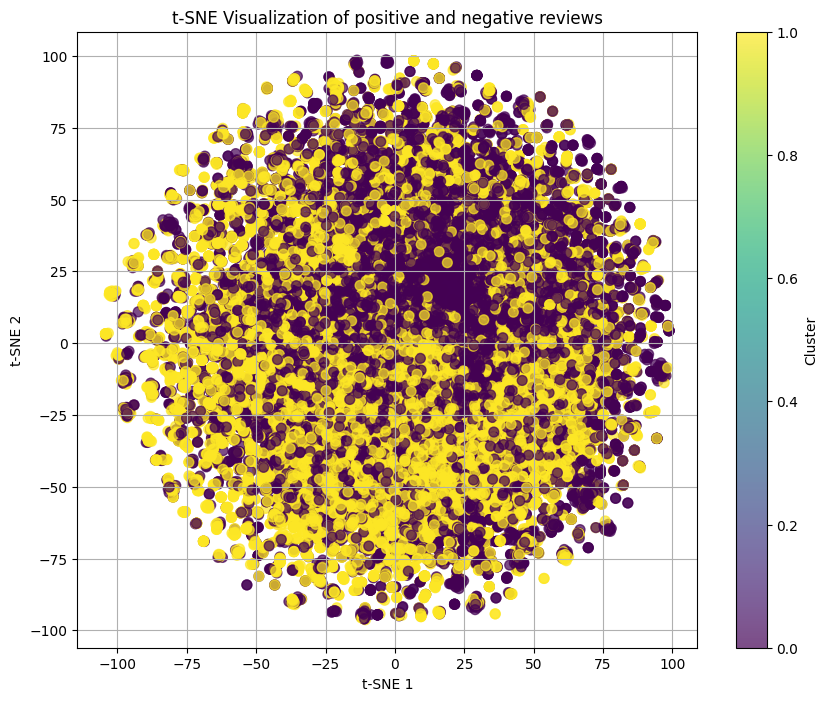

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['sentiment'], cmap='viridis', s=50, alpha=0.7)
plt.title('t-SNE Visualization of positive and negative reviews')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()

In [39]:
tfidf_vectorizer = TfidfVectorizer(  
    stop_words=None,    
    ngram_range=(1, 2)  
)

X_train_tfidf_vectorized_one_twogram = tfidf_vectorizer.fit_transform(X_train["final_reviews"])

X_test_tfid_vectorized_one_twogram = tfidf_vectorizer.transform(X_test["final_reviews"])
X_val_tfid_vectorized_one_twogram = tfidf_vectorizer.transform(X_val["final_reviews"])

X_train_tfidf_vectorized_one_twogram.shape

(35000, 1916443)

In [40]:
svm_model = SVC()
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression(max_iter=1000)

In [41]:
svm_model.fit(X_train_tfidf_vectorized_one_twogram, y_train)
knn_model.fit(X_train_tfidf_vectorized_one_twogram, y_train)
logreg_model.fit(X_train_tfidf_vectorized_one_twogram, y_train)

/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [42]:
y_val_pred_svm = svm_model.predict(X_val_tfid_vectorized_one_twogram)
y_val_pred_knn = knn_model.predict(X_val_tfid_vectorized_one_twogram)
y_val_pred_logreg = logreg_model.predict(X_val_tfid_vectorized_one_twogram)

val_acc_svm = accuracy_score(y_val, y_val_pred_svm)
val_acc_knn = accuracy_score(y_val, y_val_pred_knn)
val_acc_logreg = accuracy_score(y_val, y_val_pred_logreg)

print(f"Validation Accuracy - SVM: {val_acc_svm:.4f}")
print(f"Validation Accuracy - KNN: {val_acc_knn:.4f}")
print(f"Validation Accuracy - Logistic Regression: {val_acc_logreg:.4f}")

Validation Accuracy - SVM: 0.8834
Validation Accuracy - KNN: 0.7714
Validation Accuracy - Logistic Regression: 0.8734


In [44]:
with open("models/tfidf_vectorizer_one_two/svm_model_one_two_gram.pkl", "wb") as f:
    pickle.dump(svm_model, f)

with open("models/tfidf_vectorizer_one_two/logistic_model_one_two_gram.pkl", "wb") as f:
    pickle.dump(logreg_model, f)

with open("models/tfidf_vectorizer_one_two/knn_model_one_two_gram.pkl", "wb") as f:
    pickle.dump(knn_model, f)

with open("models/tfidf_vectorizer_one_two/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

In [45]:
tfidf_vectorizer = TfidfVectorizer(  
    stop_words=None,    
    ngram_range=(2, 2)  
)

X_train_tfidf_vectorized_twogram = tfidf_vectorizer.fit_transform(X_train["final_reviews"])

X_test_tfid_vectorized_one_twogram = tfidf_vectorizer.transform(X_test["final_reviews"])
X_val_tfid_vectorized_twogram = tfidf_vectorizer.transform(X_val["final_reviews"])

svm_model = SVC()
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression(max_iter=1000)

svm_model.fit(X_train_tfidf_vectorized_twogram, y_train)
knn_model.fit(X_train_tfidf_vectorized_twogram, y_train)
logreg_model.fit(X_train_tfidf_vectorized_twogram, y_train)

y_val_pred_svm = svm_model.predict(X_val_tfid_vectorized_twogram)
y_val_pred_knn = knn_model.predict(X_val_tfid_vectorized_twogram)
y_val_pred_logreg = logreg_model.predict(X_val_tfid_vectorized_twogram)

val_acc_svm = accuracy_score(y_val, y_val_pred_svm)
val_acc_knn = accuracy_score(y_val, y_val_pred_knn)
val_acc_logreg = accuracy_score(y_val, y_val_pred_logreg)

print(f"Validation Accuracy - SVM: {val_acc_svm:.4f}")
print(f"Validation Accuracy - KNN: {val_acc_knn:.4f}")
print(f"Validation Accuracy - Logistic Regression: {val_acc_logreg:.4f}")

/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation Accuracy - SVM: 0.8230
Validation Accuracy - KNN: 0.7466
Validation Accuracy - Logistic Regression: 0.8230


In [46]:
tfidf_vectorizer = TfidfVectorizer(  
    stop_words=None,    
    ngram_range=(1, 3)  
)

X_train_tfidf_vectorized_one_three_gram = tfidf_vectorizer.fit_transform(X_train["final_reviews"])

X_test_tfid_vectorized_one_three_gram = tfidf_vectorizer.transform(X_test["final_reviews"])
X_val_tfid_vectorized_one_three_gram = tfidf_vectorizer.transform(X_val["final_reviews"])

svm_model = SVC()
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression(max_iter=1000)

svm_model.fit(X_train_tfidf_vectorized_one_three_gram, y_train)
knn_model.fit(X_train_tfidf_vectorized_one_three_gram, y_train)
logreg_model.fit(X_train_tfidf_vectorized_one_three_gram, y_train)

y_val_pred_svm = svm_model.predict(X_val_tfid_vectorized_one_three_gram)
y_val_pred_knn = knn_model.predict(X_val_tfid_vectorized_one_three_gram)
y_val_pred_logreg = logreg_model.predict(X_val_tfid_vectorized_one_three_gram)

val_acc_svm = accuracy_score(y_val, y_val_pred_svm)
val_acc_knn = accuracy_score(y_val, y_val_pred_knn)
val_acc_logreg = accuracy_score(y_val, y_val_pred_logreg)

print(f"Validation Accuracy - SVM: {val_acc_svm:.4f}")
print(f"Validation Accuracy - KNN: {val_acc_knn:.4f}")
print(f"Validation Accuracy - Logistic Regression: {val_acc_logreg:.4f}")

/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation Accuracy - SVM: 0.8738
Validation Accuracy - KNN: 0.7756
Validation Accuracy - Logistic Regression: 0.8654


In [47]:
with open("models/tfidf_vectorizer_one_three/svm_model_one_three_gram.pkl", "wb") as f:
    pickle.dump(svm_model, f)

with open("models/tfidf_vectorizer_one_three/logistic_model_one_three_gram.pkl", "wb") as f:
    pickle.dump(logreg_model, f)

with open("models/tfidf_vectorizer_one_three/knn_model_one_three_gram.pkl", "wb") as f:
    pickle.dump(knn_model, f)

with open("models/tfidf_vectorizer_one_three/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

In [54]:
logreg_model = LogisticRegression(C=100, max_iter=10000)
logreg_model.fit(X_train_tfidf_vectorized_one_three_gram, y_train)
y_val_pred_logreg = logreg_model.predict(X_val_tfid_vectorized_one_three_gram)
val_acc_logreg = accuracy_score(y_val, y_val_pred_logreg)
print(f"Validation Accuracy - Logistic Regression: {val_acc_logreg:.4f}")


/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation Accuracy - Logistic Regression: 0.8894


In [58]:
tfidf_vectorizer = TfidfVectorizer(  
    stop_words=None,    
    ngram_range=(1, 1)  
)

X_train_tfidf_vectorized_onegram = tfidf_vectorizer.fit_transform(X_train["final_reviews"])

X_test_tfid_vectorized_onegram = tfidf_vectorizer.transform(X_test["final_reviews"])
X_val_tfid_vectorized_onegram = tfidf_vectorizer.transform(X_val["final_reviews"])


In [63]:
logreg_model = LogisticRegression(max_iter=10000, C=6)
logreg_model.fit(X_train_tfidf_vectorized_onegram, y_train)
y_val_pred_logreg = logreg_model.predict(X_val_tfid_vectorized_onegram)

val_acc_logreg = accuracy_score(y_val, y_val_pred_logreg)

print(f"Validation Accuracy - Logistic Regression: {val_acc_logreg:.4f}")

/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation Accuracy - Logistic Regression: 0.8846


In [4]:
sentiments = pd.read_pickle('data/sentiments.pkl')
sentiments.head()

,sentiment
0,1
1,1
2,1
3,0
4,1


In [6]:
from sklearn.model_selection import train_test_split
final_tokens = reviews.drop(columns = ["review", "lemmatized_tokens"])
X_train, X_temp, y_train, y_temp = train_test_split(final_tokens, sentiments, test_size=0.30, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33333, random_state=42)
X_train["final_reviews"] = X_train["final_tokens"].apply(lambda x: " ".join(x))
X_test["final_reviews"] = X_test["final_tokens"].apply(lambda x: " ".join(x))
X_val["final_reviews"] = X_val["final_tokens"].apply(lambda x: " ".join(x))
X_train_tokenized = X_train.drop("final_reviews", axis=1)
X_train = X_train.drop("final_tokens", axis=1)
X_test_tokenized = X_test.drop("final_reviews", axis=1)
X_test = X_test.drop("final_tokens", axis=1)
X_val_tokenized = X_val.drop("final_reviews", axis=1)
X_val = X_val.drop("final_tokens", axis=1)
X_val

,final_reviews
45040,national lampoon remain animal house rightly f...
20713,great filmmaker piece garbage minute sheer ted...
9836,intrigue nasty boss character actual bosss dau...
44734,problem child goofiest movie people disagree d...
40160,shame movie cinematography plot support work s...
...,...
31387,film last minute maximum interesting conceptth...
35406,fine musical timeless worth time delicious act...
3375,matter hurt movie beenmaybe mislead countless ...
30489,like movie imply publish review actually movie...


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [65]:

tfidf_vectorizer = TfidfVectorizer(  
    stop_words=None,    
    ngram_range=(1, 1)  
)

X_train_tfidf_vectorized_onegram = tfidf_vectorizer.fit_transform(X_train["final_reviews"])

X_test_tfid_vectorized_onegram = tfidf_vectorizer.transform(X_test["final_reviews"])
X_val_tfid_vectorized_onegram = tfidf_vectorizer.transform(X_val["final_reviews"])

X_train_tfidf_vectorized_onegram.shape

(35000, 111989)

In [67]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=17)
rf.fit(X_train_tfidf_vectorized_onegram, y_train)
y_pred_train = rf.predict(X_train_tfidf_vectorized_onegram)
y_pred_val = rf.predict(X_val_tfid_vectorized_onegram)

print("Accuracy train:", accuracy_score(y_train, y_pred_train))
print("Classification Report train:\n", classification_report(y_train, y_pred_train))

print("Accuracy val:", accuracy_score(y_val, y_pred_val))
print("Classification Report val:\n", classification_report(y_val, y_pred_val))

/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy train: 0.9071714285714285
Classification Report train:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91     17589
           1       0.89      0.92      0.91     17411

    accuracy                           0.91     35000
   macro avg       0.91      0.91      0.91     35000
weighted avg       0.91      0.91      0.91     35000

Accuracy val: 0.8476
Classification Report val:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      2493
           1       0.84      0.86      0.85      2507

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [69]:
with open("models/rf_tfidf_vectorizer/rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("models/rf_tfidf_vectorizer/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

In [1]:
import pandas as pd
import numpy as np

X_train = pd.read_pickle("data/X_train.pkl")
X_test = pd.read_pickle("data/X_test.pkl")
y_train = pd.read_pickle("data/y_train.pkl")
y_test = pd.read_pickle("data/y_test.pkl")
X_val = pd.read_pickle("data/X_val.pkl")
y_val = pd.read_pickle("data/y_val.pkl")


In [2]:
import torch
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset



In [3]:
def convert_to_dataset(df):
    return Dataset.from_pandas(df)

In [4]:
train_df = X_train.copy()
train_df["label"] = y_train
val_df = X_val.copy()
val_df["label"] = y_val

In [1]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
def tokenize_function(examples):
    return tokenizer(examples["final_reviews"], padding="max_length", truncation=True, max_length=128)

In [9]:
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

In [10]:
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [11]:
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

In [12]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
from sklearn.metrics import accuracy_score

def compute_metrics(pred):
    predictions = np.argmax(pred.predictions, axis=1)
    return {"accuracy": accuracy_score(pred.label_ids, predictions)}


In [14]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
)

/home/parsamhb82/university/term5/data_mining/Datamining_Project_3/prj3/lib/python3.12/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [15]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [16]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.509500,0.320532,0.876400
2,0.203800,0.407439,0.876800
3,0.039100,0.520089,0.883400


TrainOutput(global_step=13125, training_loss=0.2804193105365549, metrics={'train_runtime': 4197.1047, 'train_samples_per_second': 25.017, 'train_steps_per_second': 3.127, 'total_flos': 3477269214720000.0, 'train_loss': 0.2804193105365549, 'epoch': 3.0})

In [ ]:
eval_results = trainer.evaluate()
print(f"Validation Accuracy: {eval_results['eval_accuracy']:.4f}")

Validation Accuracy: 0.8834
